## TF Keras API
* keras == tf.keras
    * Graph와 Layer 구조와 생성을 추상화
* keras.Sequencial
    * Model 생성
    * Layer stack
    * `add(Layer)` : 계층 추가
    * `model.trainable_variables` : 훈련에 사용할 모든 변수
    * `call(x)` : prediction
* keras.layers
    * Layer를 추상화
    * keras.layers.Dense
        * 가장 일반적인 완전연결층(밀집층)
    * keras.layers.RNN, LSTM
        * 시계열이나 시퀀스는 3D로 텐서로 표현
    * keras.layers.Conv2D
        * 이미지는 4D로 저장되고 CNN
    * 생성할때 출력층은 필수고 입력 층은 input_shape 인자로 넘기는데, 샘플 축은 생략
        * 예를 들어 `Dense(32, input_shape=(784,))` 이면 입력이 n x 784, 이때 n은 몇개든 상관없슴
        * 만약 `Dense(10)` 이렇게 입력층 생략하면 앞 층의 출력의 갯수로 자동 지정
* 손실함수
    * `tf.keras.losses`
    * 2개 클래스 : 
        `BinaryCrossentropy`
    * 여러 클래스 분류 : 
        * `tf.kearas.losses.CategoricalCrossentropy()`  : One-Hot encoding Label에 대한 crossEntropy 손실함수
        * `tf.keras.losses.SparseCategoricalCrossentropy()` : Label에 대한(one-hot 안한) crossEntropy 손실함수
    * 회귀 : 
        * `MSE` : 평균제곱오차
* 성능 지표 측정
    * `tf.keras.metrics`
        * `Mean`
        * `SparseCategoricalAccuracy`
* Neural Nework 생성 절차
    * 층(Layer) 갯수
    * 입력 / 출력 갯수
    * 손실함수 선택
    * 옵티마이저 선택
    * 성능 추적 지표 선택

    
    

In [13]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_input = 28*28
n_L1 = 300
n_L2 = 100
n_output = 10

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, n_input)/255.0
X_test = X_test.astype(np.float32).reshape(-1, n_input)/255.0
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

batch_size = 100
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(10000).batch(batch_size)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(n_L1, activation=tf.nn.relu, input_shape=(n_input,)),  # 입력의 형태가 필요합니다.
    tf.keras.layers.Dense(n_L2, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(n_output, activation=tf.nn.softmax)
])

n_epochs = 10

step = 0

train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
validate_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='validation_accuracy')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()

for epoch in range(n_epochs):
    for x, y in train_ds:
        with tf.GradientTape() as tape: 
            predictions = model(x, training=True)
            #cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=predictions))
            cost = loss_object(y, predictions)
        grads = tape.gradient(cost, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
        train_loss(cost)
        train_accuracy(y, predictions)
        validate_accuracy(y_valid, model(X_valid, training=False))
    print(f"epoch:{epoch}, cost:{train_loss.result()}, \
              test_accuracy:{train_accuracy.result()}, validate_accuracy:{validate_accuracy.result()}")

'''
for x, y in test_ds:
    predictions = model(x, training=False)
    test_accuracy(y, predictions)
'''
test_accuracy(y_test,  model(X_test, training=False))
print(f"test acc:{test_accuracy.result()}")

epoch:0, cost:0.3544638752937317,               test_accuracy:0.8994181752204895, validate_accuracy:0.9297592639923096
epoch:1, cost:0.2787792980670929,               test_accuracy:0.9227545261383057, validate_accuracy:0.9446896314620972
epoch:2, cost:0.2470322549343109,               test_accuracy:0.9322606325149536, validate_accuracy:0.9500806331634521
epoch:3, cost:0.22830815613269806,               test_accuracy:0.937995433807373, validate_accuracy:0.9530791640281677
epoch:4, cost:0.2167930155992508,               test_accuracy:0.9415673017501831, validate_accuracy:0.9551419019699097
epoch:5, cost:0.20775644481182098,               test_accuracy:0.9444727301597595, validate_accuracy:0.9567382335662842
epoch:6, cost:0.19935767352581024,               test_accuracy:0.9471091032028198, validate_accuracy:0.9580285549163818
epoch:7, cost:0.19296996295452118,               test_accuracy:0.949150025844574, validate_accuracy:0.9589926600456238
epoch:8, cost:0.18813347816467285,            

## Keras High-Level API
* High-Level Neural Networks API
* 간결한 문법
* 지원하는 백엔드(Back-end) 엔진
    * Tensorflow
    * CNTK
    * Theano (최초 Theano 겨냥해서 시작)
* 백엔드 종속성 제거
* Tensorflow의 공식 High-level API로 선정
* 가장 인기 있는 인공지능 라이브러리

![image.png](https://i.imgur.com/APiGGgd.png)
![image.png](https://i.imgur.com/rlDMvPH.png)


* model.compile()
* model.fit()
* model.evaluate()
* model.predict()

In [18]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_input = 28*28
n_L1 = 300
n_L2 = 100
n_output = 10

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
#X_train = X_train.astype(np.float32).reshape(-1, n_input)/255.0
#X_test = X_test.astype(np.float32).reshape(-1, n_input)/255.0
X_train = X_train/255.0
X_test = X_test/255.0

X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(n_L1, activation=tf.nn.relu ), #, input_shape=(n_input,)),  # 입력의 형태가 필요합니다.
    tf.keras.layers.Dense(n_L2, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(n_output, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_valid, y_valid))

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print("Test Accuracy:{}".format(test_acc))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 2s 37us/sample - loss: 0.3772 - accuracy: 0.8904 - val_loss: 0.1386 - val_accuracy: 0.9608
Epoch 2/10
55000/55000 [==============================] - 2s 32us/sample - loss: 0.1534 - accuracy: 0.9565 - val_loss: 0.0969 - val_accuracy: 0.9708
Epoch 3/10
55000/55000 [==============================] - 2s 29us/sample - loss: 0.1071 - accuracy: 0.9694 - val_loss: 0.0819 - val_accuracy: 0.9776
Epoch 4/10
55000/55000 [==============================] - 2s 30us/sample - loss: 0.0812 - accuracy: 0.9758 - val_loss: 0.0749 - val_accuracy: 0.9796
Epoch 5/10
55000/55000 [==============================] - 2s 30us/sample - loss: 0.0638 - accuracy: 0.9812 - val_loss: 0.0750 - val_accuracy: 0.9776
Epoch 6/10
55000/55000 [==============================] - 2s 31us/sample - loss: 0.0540 - accuracy: 0.9836 - val_loss: 0.0778 - val_accuracy: 0.9770
Epoch 7/10
55000/55000 [==============================] -

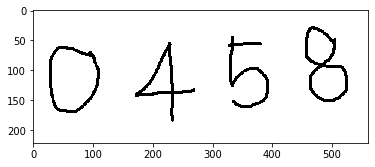

[0 4 5 3]


In [31]:
%matplotlib inline

import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import img2data
img_path = '../../img/0458.png'
#img_path = './img/1369.png'

image = cv2.imread(img_path)
plt.imshow(image)
plt.show()

numbers = img2data.img2digits(image, (28,28), border=4, reshape=False)
Z = model.predict(np.float32(numbers)/255.0)
pred = np.argmax(Z, axis=1)
print(pred)